In [2]:
# 📌 Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

# Regression models

## 📌 Load Dataset

In [3]:
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [7]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## Set up DataFrame

In [8]:
# 📌 Create DataFrame  
df = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
df_target = pd.DataFrame(diabetes['target'],columns=['Cancer'])
df_target.head()

,Cancer
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [10]:
db_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
db_df['Progression'] = diabetes.target #new column name 'Progression'
db_df.sample(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
408,0.063504,-0.044642,-0.050396,0.107944,0.031454,0.019354,-0.017629,0.023608,0.058038,0.040343,189.0
63,-0.034575,-0.044642,-0.037463,-0.060756,0.020446,0.043466,-0.013948,-0.002592,-0.030748,-0.071494,128.0


In [11]:
corr = db_df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


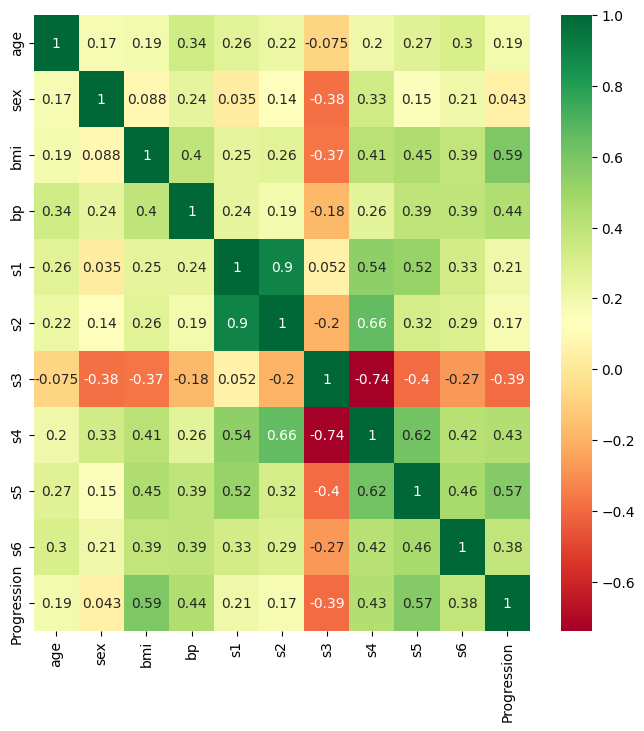

In [12]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

## Train test Split

In [13]:
## Train test Split
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353, 1), (89, 1))

In [14]:
# 📌 Standardize Data (for models that require scaling)
scaler_reg = StandardScaler()
X_train = scaler_reg.fit_transform(X_train)
X_test = scaler_reg.transform(X_test)

## 📌 Train Decision Tree Regressor

In [15]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Predictions & Evaluation

In [16]:
y_pred_dt_reg = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt_reg)
r2_dt = r2_score(y_test, y_pred_dt_reg)

print(f"Decision Tree Regression - MSE: {mse_dt:.4f}, R² Score: {r2_dt:.4f}")

Decision Tree Regression - MSE: 4609.0899, R² Score: 0.1301


# 📌 Train Random Forest Regressor

In [17]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

c:\Users\gtheis2\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

### Predictions & Evaluation

In [18]:
# 📌 Predictions & Evaluation
y_pred_rf_reg = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf = r2_score(y_test, y_pred_rf_reg)

print(f"Random Forest Regression - MSE: {mse_rf:.4f}, R² Score: {r2_rf:.4f}")

Random Forest Regression - MSE: 3032.9424, R² Score: 0.4275


# 📌 Train SVM Regressor

In [19]:
# 📌 Train SVM Regressor
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)

c:\Users\gtheis2\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predictions & Evaluation

In [20]:
y_pred_svm_reg = svm_regressor.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm_reg)
r2_svm = r2_score(y_test, y_pred_svm_reg)

print(f"SVM Regression - MSE: {mse_svm:.4f}, R² Score: {r2_svm:.4f}")

SVM Regression - MSE: 4332.7385, R² Score: 0.1822


# 📌 Train Neural Network Regressor

In [21]:
ann_regressor = MLPRegressor(max_iter=500)
ann_regressor.fit(X_train, y_train)

c:\Users\gtheis2\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gtheis2\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=500)

### Predictions & Evaluation

In [22]:
y_pred_ann_reg = ann_regressor.predict(X_test)
mse_ann = mean_squared_error(y_test, y_pred_ann_reg)
r2_ann = r2_score(y_test, y_pred_ann_reg)

print(f"ANN Regression - MSE: {mse_ann:.4f}, R² Score: {r2_ann:.4f}")

ANN Regression - MSE: 4488.3107, R² Score: 0.1529


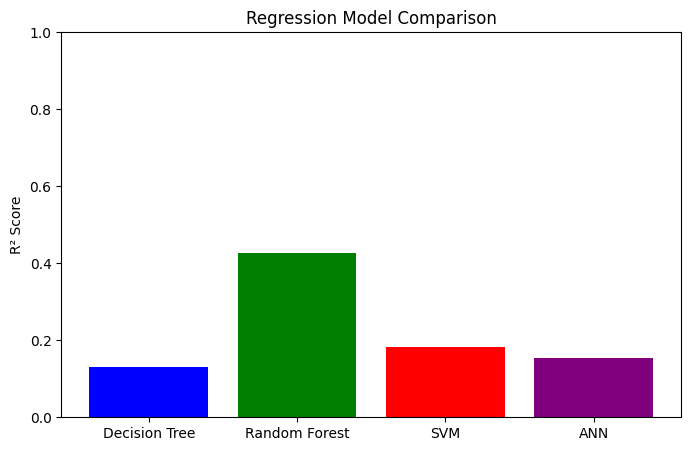

In [23]:
# 📌 Plot Regression Results
models_reg = ["Decision Tree", "Random Forest", "SVM", "ANN"]
r2_scores = [r2_dt, r2_rf, r2_svm, r2_ann]

plt.figure(figsize=(8,5))
plt.bar(models_reg, r2_scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("R² Score")
plt.title("Regression Model Comparison")
plt.ylim(0, 1)
plt.show()

In [24]:
# 📌 Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# 📌 Train-Test Split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📌 Standardize Features (important for SVM & ANN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 Ensure y is 1D
y_train = y_train.ravel()
y_test = y_test.ravel()


# 📌 Define Hyperparameter Grid for Regression Models

# For Decision Tree Regressor
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# For Random Forest Regressor
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# For Support Vector Machine Regressor
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# For Neural Network Regressor (ANN)
ann_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'max_iter': [500]
}

# 📌 Function to Optimize Regression Models using GridSearchCV
def optimize_regression_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

# 📌 Model Training & Optimization for Regression

# Decision Tree
dt_regressor_opt = optimize_regression_model(DecisionTreeRegressor(), dt_param_grid, X_train, y_train)
y_test_pred_dt = dt_regressor_opt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_test_pred_dt)
r2_dt = r2_score(y_test, y_test_pred_dt)
print(f"Optimized Decision Tree - MSE: {mse_dt:.4f}, R² Score: {r2_dt:.4f}")

# Random Forest
rf_regressor_opt = optimize_regression_model(RandomForestRegressor(), rf_param_grid, X_train, y_train)
y_test_pred_rf = rf_regressor_opt.predict(X_test)
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)
print(f"Optimized Random Forest - MSE: {mse_rf:.4f}, R² Score: {r2_rf:.4f}")

# Support Vector Machine
svm_regressor_opt = optimize_regression_model(SVR(), svm_param_grid, X_train, y_train)
y_test_pred_svm = svm_regressor_opt.predict(X_test)
mse_svm = mean_squared_error(y_test, y_test_pred_svm)
r2_svm = r2_score(y_test, y_test_pred_svm)
print(f"Optimized SVM - MSE: {mse_svm:.4f}, R² Score: {r2_svm:.4f}")

# Artificial Neural Network
ann_regressor_opt = optimize_regression_model(MLPRegressor(max_iter=500), ann_param_grid, X_train, y_train)
y_test_pred_ann = ann_regressor_opt.predict(X_test)
mse_ann = mean_squared_error(y_test, y_test_pred_ann)
r2_ann = r2_score(y_test, y_test_pred_ann)
print(f"Optimized ANN - MSE: {mse_ann:.4f}, R² Score: {r2_ann:.4f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for DecisionTreeRegressor: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Optimized Decision Tree - MSE: 3616.7699, R² Score: 0.3300
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest - MSE: 2881.6707, R² Score: 0.4662
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for SVR: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Optimized SVM - MSE: 2856.7597, R² Score: 0.4708
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for MLPRegressor: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 500, 'solver': 'adam'}
Optimized ANN - MSE: 2948.0779, R² Score: 0.4539


c:\Users\gtheis2\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


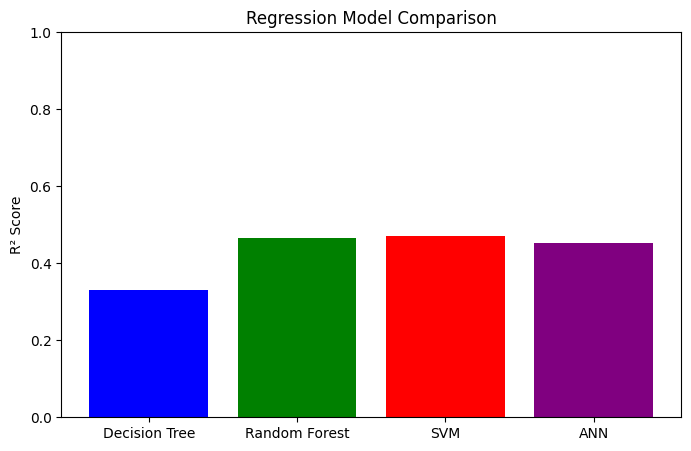

In [25]:
models_reg = ["Decision Tree", "Random Forest", "SVM", "ANN"]
r2_scores = [r2_dt, r2_rf, r2_svm, r2_ann]

plt.figure(figsize=(8,5))
plt.bar(models_reg, r2_scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("R² Score")
plt.title("Regression Model Comparison")
plt.ylim(0, 1)
plt.show()